## Loading Data

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("TSLA.csv")

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,10/15/2018,17.270666,17.552000,16.969334,17.306000,17.306000,93000000
1,10/16/2018,17.713333,18.492001,17.482668,18.439333,18.439333,142896000
2,10/17/2018,18.826668,18.846666,17.719999,18.118668,18.118668,129832500
3,10/18/2018,17.952667,18.066668,17.533333,17.594000,17.594000,81318000
4,10/19/2018,17.826000,17.977333,16.900000,17.333332,17.333332,140632500
...,...,...,...,...,...,...,...
1253,10/9/2023,255.309998,261.359985,252.050003,259.670013,259.670013,101377900
1254,10/10/2023,257.750000,268.940002,257.649994,263.619995,263.619995,122656000
1255,10/11/2023,266.200012,268.600006,260.899994,262.989990,262.989990,103706300
1256,10/12/2023,262.920013,265.410004,256.630005,258.869995,258.869995,111508100


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' column to datetime format
data.set_index('Date', inplace=True)  # Set 'Date' as the DataFrame index

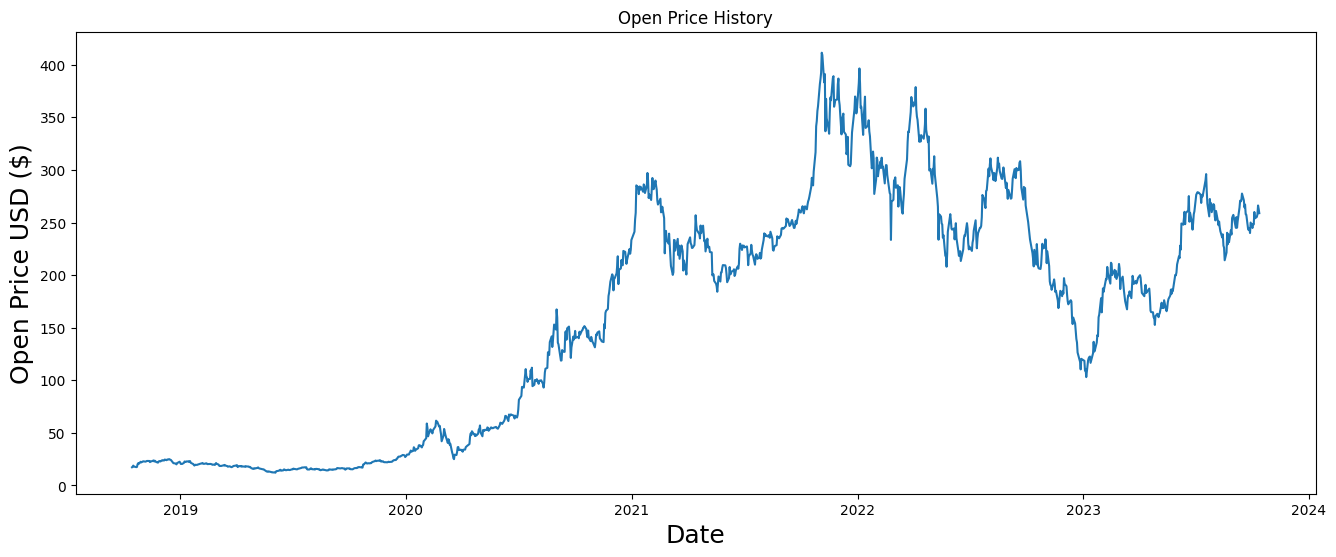

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Open Price History')
plt.plot(data['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.show()


# Spliting Data as Train and Validation

In [ ]:
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1258
Train data length : 881
Validation data lenth : 377


In [ ]:
train_data = data[:length_train].iloc[:,:2]
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Open
0,2018-10-15,17.270666
1,2018-10-16,17.713333
2,2018-10-17,18.826668
3,2018-10-18,17.952667
4,2018-10-19,17.826000
...,...,...
876,2022-04-07,350.796661
877,2022-04-08,347.736664
878,2022-04-11,326.799988
879,2022-04-12,332.546661


In [ ]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Open
881,2022-04-14,333.096680
882,2022-04-18,329.676666
883,2022-04-19,335.019989
884,2022-04-20,343.333344
885,2022-04-21,358.243347
...,...,...
1253,2023-10-09,255.309998
1254,2023-10-10,257.750000
1255,2023-10-11,266.200012
1256,2023-10-12,262.920013


## Creating Train Dataset from Train split

In [ ]:
dataset_train = train_data.Open.values
dataset_train.shape

(881,)

In [ ]:
# Change 1d array to 2d array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(881, 1)

## Normalization / Feature Scaling

In [ ]:
#Dataset values will be in between 0 and 1 after scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(881, 1)

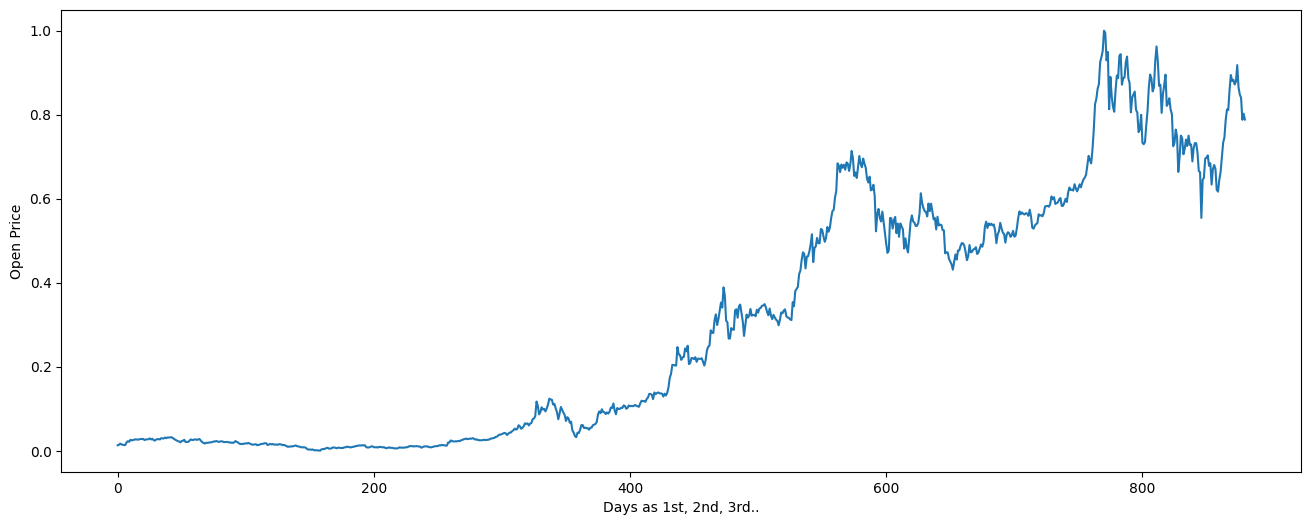

In [ ]:
plt.subplots(figsize = (16,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

## Creating X_train and y_train from Train data



In [ ]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])

# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (831, 50)
Shape of y_train before reshape : (831,)


## Reshape

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (831, 50, 1)
Shape of y_train after reshape : (831, 1)


Shape of X_train :831 x 50 x 1

That means we have 831 rows, each row has 50 rows and 1 column

Lets check the first row: it has 50 rows (open prices of 49 days)

In [ ]:
X_train[0]

array([[0.01301296],
       [0.0141213 ],
       [0.01690884],
       [0.01472054],
       [0.01440339],
       [0.01328337],
       [0.01381584],
       [0.02002187],
       [0.02272094],
       [0.02122368],
       [0.02610103],
       [0.02458542],
       [0.02527813],
       [0.0262329 ],
       [0.02714762],
       [0.0266068 ],
       [0.02636811],
       [0.02708085],
       [0.02794215],
       [0.0280256 ],
       [0.02792045],
       [0.02538162],
       [0.02697402],
       [0.02691226],
       [0.02738965],
       [0.02925079],
       [0.02681545],
       [0.02852636],
       [0.02558025],
       [0.02401957],
       [0.02653169],
       [0.02752318],
       [0.02769177],
       [0.0268288 ],
       [0.02986171],
       [0.02920238],
       [0.0291957 ],
       [0.03136397],
       [0.02986171],
       [0.03151587],
       [0.03143408],
       [0.03155593],
       [0.03236549],
       [0.03019554],
       [0.02828266],
       [0.02612273],
       [0.02436175],
       [0.022

Check the first item in y_train
It is the price of 50th day

In [ ]:
y_train[0]

array([0.02315826])

Creating RNN model

In [ ]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True,
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
26/26 [==============================] - 11s 128ms/step - loss: 0.4699 - accuracy: 0.0024
Epoch 2/50
26/26 [==============================] - 4s 138ms/step - loss: 0.3006 - accuracy: 0.0012
Epoch 3/50
26/26 [==============================] - 3s 104ms/step - loss: 0.1921 - accuracy: 0.0024
Epoch 4/50
26/26 [==============================] - 3s 106ms/step - loss: 0.1659 - accuracy: 0.0024
Epoch 5/50
26/26 [==============================] - 2s 94ms/step - loss: 0.1439 - accuracy: 0.0024
Epoch 6/50
26/26 [==============================] - 4s 151ms/step - loss: 0.1010 - accuracy: 0.0024
Epoch 7/50
26/26 [==============================] - 1s 46ms/step - loss: 0.0891 - accuracy: 0.0024
Epoch 8/50
26/26 [==============================] - 1s 46ms/step - loss: 0.0837 - accuracy: 0.0024
Epoch 9/50
26/26 [==============================] - 1s 46ms/step - loss: 0.0746 - accuracy: 0.0024
Epoch 10/50
26/26 [==============================] - 1s 46ms/step - loss: 0.0603 - accuracy: 0.0024
Epo

## Evaluating Model

In [ ]:
# Losses
history.history["loss"]

[0.46994149684906006,
 0.30060964822769165,
 0.19213718175888062,
 0.16588100790977478,
 0.1438824087381363,
 0.10098127275705338,
 0.08911164104938507,
 0.08374706655740738,
 0.07455720752477646,
 0.06032264977693558,
 0.05209416151046753,
 0.04659156873822212,
 0.04673616960644722,
 0.03830382972955704,
 0.038986437022686005,
 0.028819464147090912,
 0.02926616370677948,
 0.02773238718509674,
 0.025814203545451164,
 0.02168898656964302,
 0.02277517504990101,
 0.021040823310613632,
 0.019624363631010056,
 0.020861243829131126,
 0.020821280777454376,
 0.017346305772662163,
 0.018219735473394394,
 0.01424915436655283,
 0.01563141494989395,
 0.013819870539009571,
 0.012853865511715412,
 0.013221122324466705,
 0.014183874242007732,
 0.012353423051536083,
 0.011676687747240067,
 0.011785846203565598,
 0.00996898952871561,
 0.007663445081561804,
 0.01042057666927576,
 0.009059172123670578,
 0.009082120843231678,
 0.008180663920938969,
 0.00835014134645462,
 0.008312501013278961,
 0.007744882

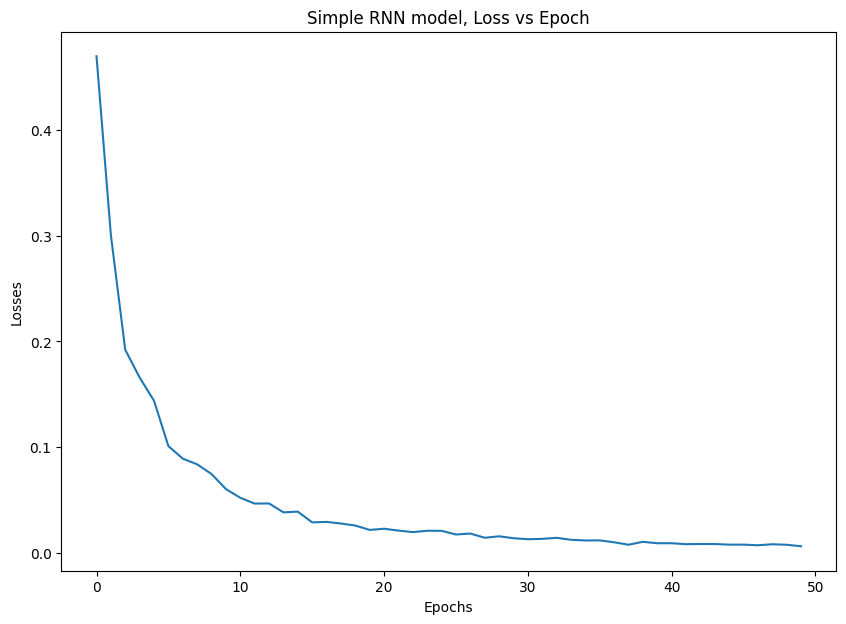

In [ ]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

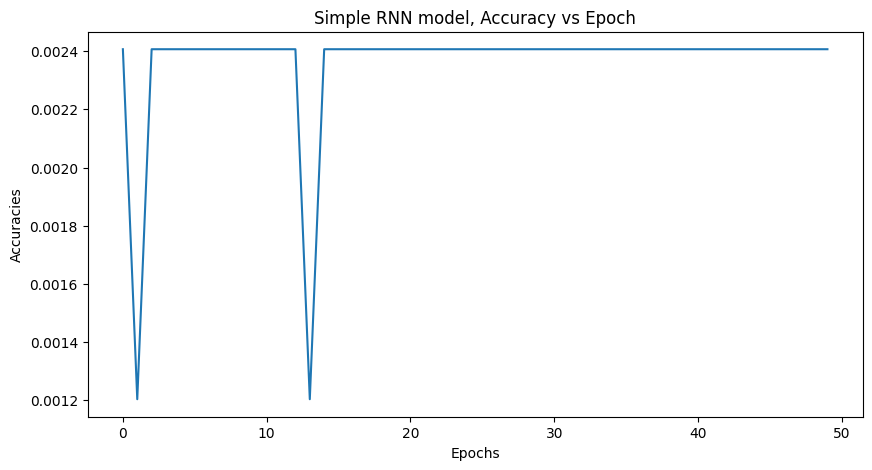

In [ ]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

## Model predictions for train data

In [ ]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

26/26 [==============================] - 1s 14ms/step


(831, 1)

In [ ]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(831, 1)

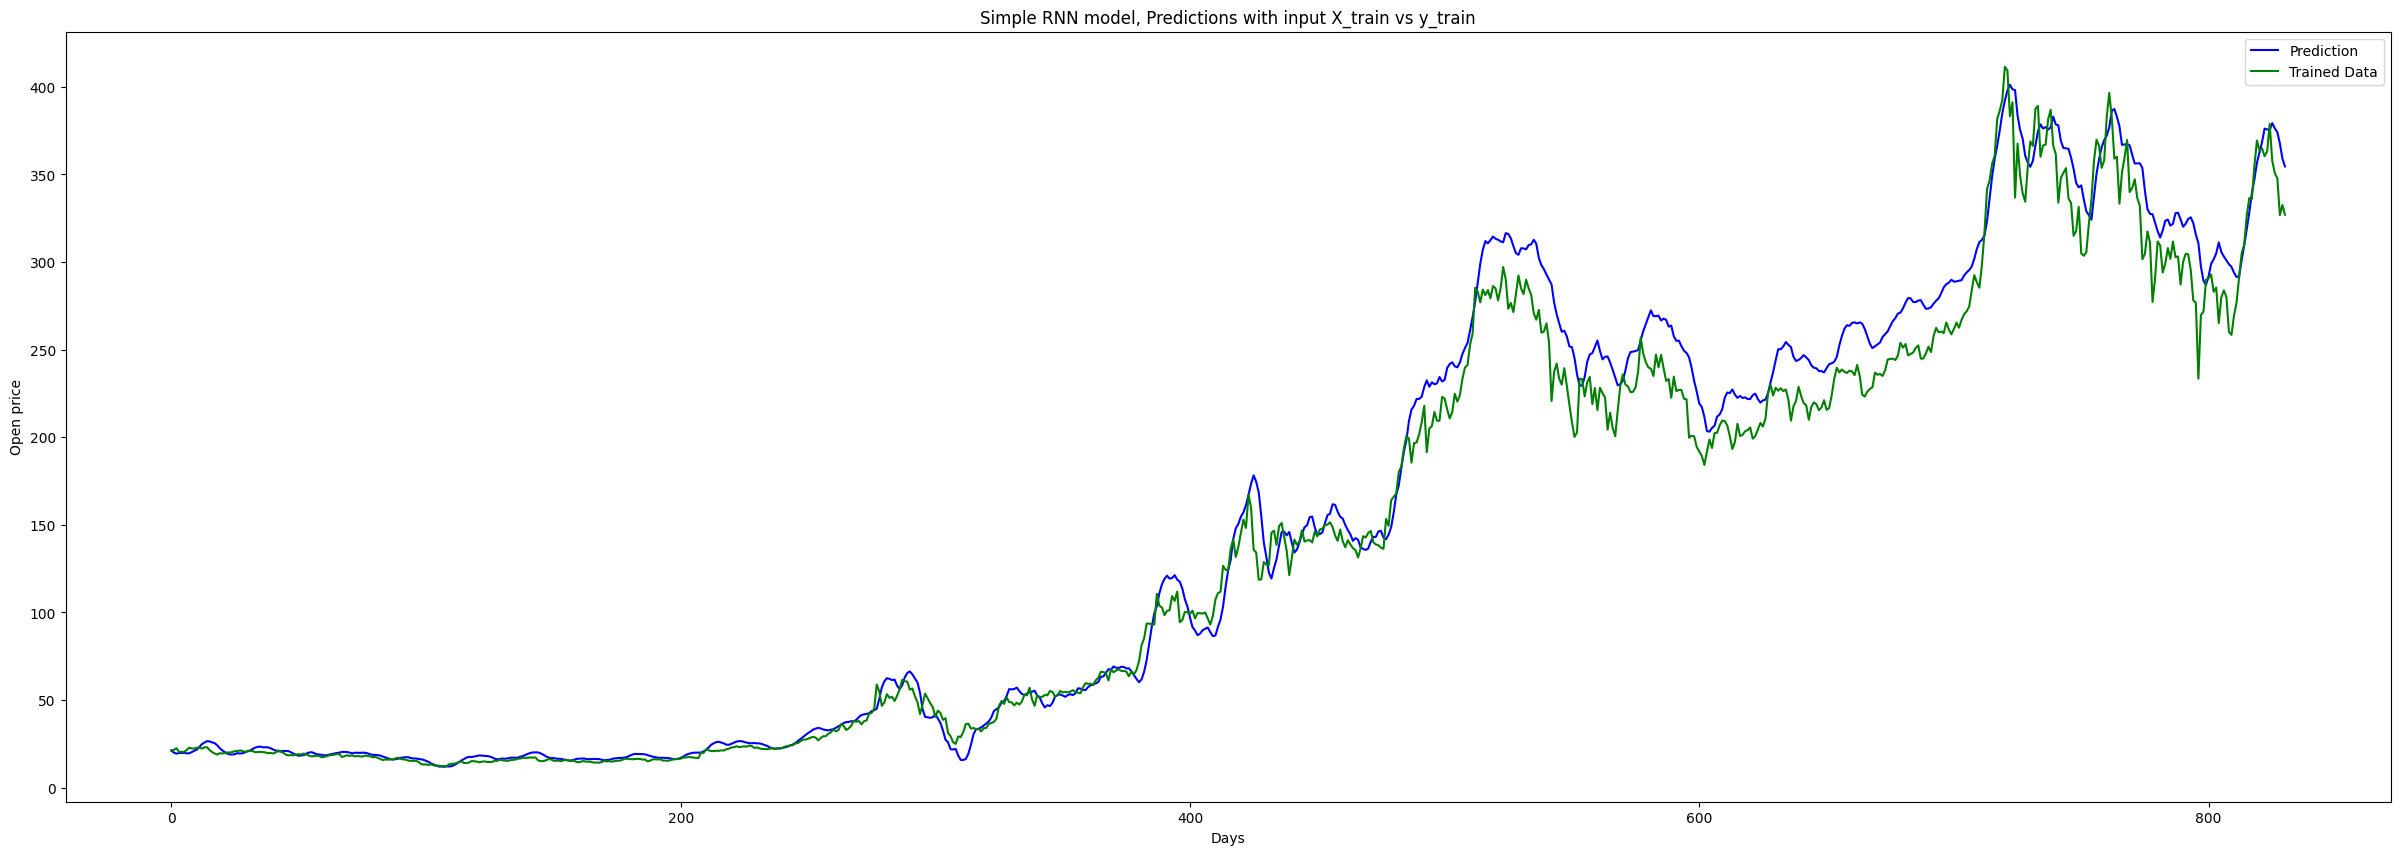

In [ ]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "Prediction" )
plt.plot(y_train, color = "g", label = "Trained Data")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()


## Creating Test Dataset from Validation Data

Converting array and scaling

In [ ]:
dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (377, 1)


 Creating X_test and y_test

In [ ]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

Converting to array

In [ ]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (327, 50)
Shape of y_test before reshape : (327,)


Reshape

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [ ]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (327, 50, 1)
Shape of y_test after reshape : (327, 1)


## Model prediction with Validation Data

In [ ]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

11/11 [==============================] - 0s 14ms/step
Shape of y_pred_of_test : (327, 1)


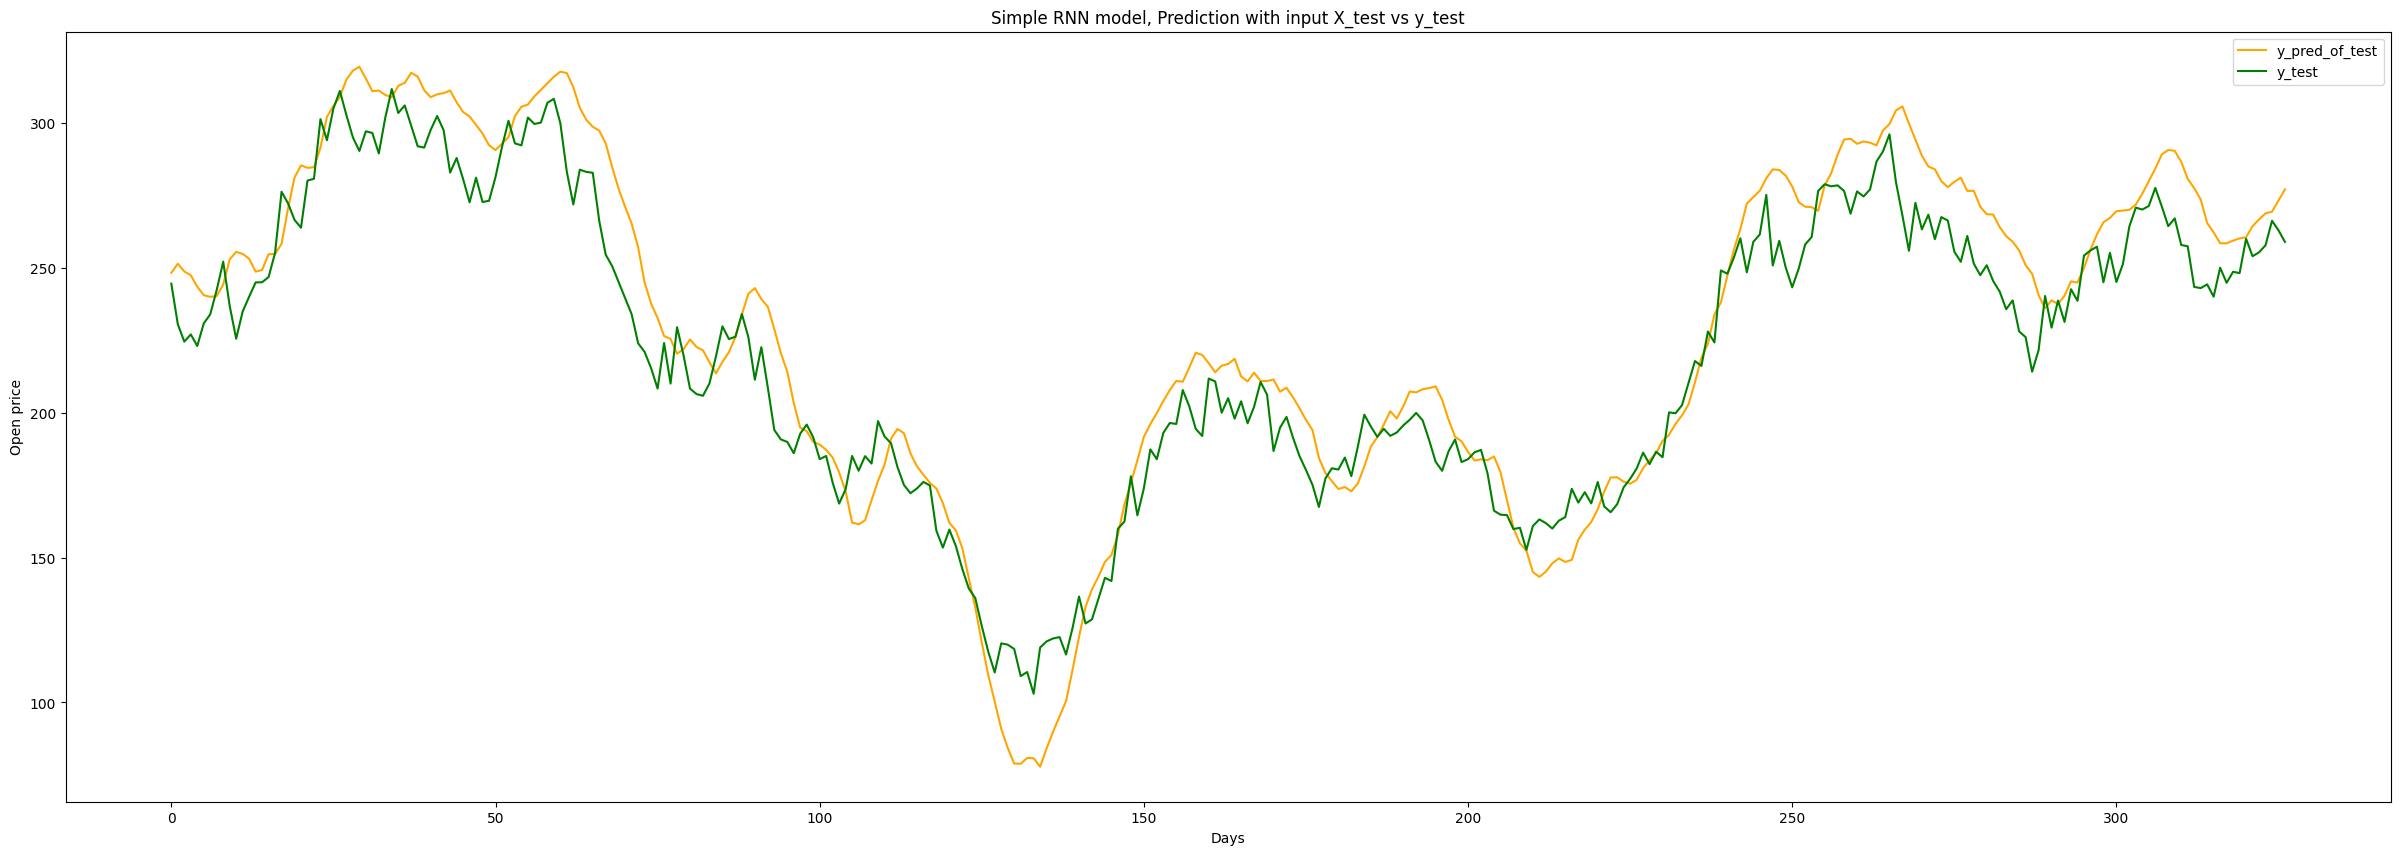

In [ ]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

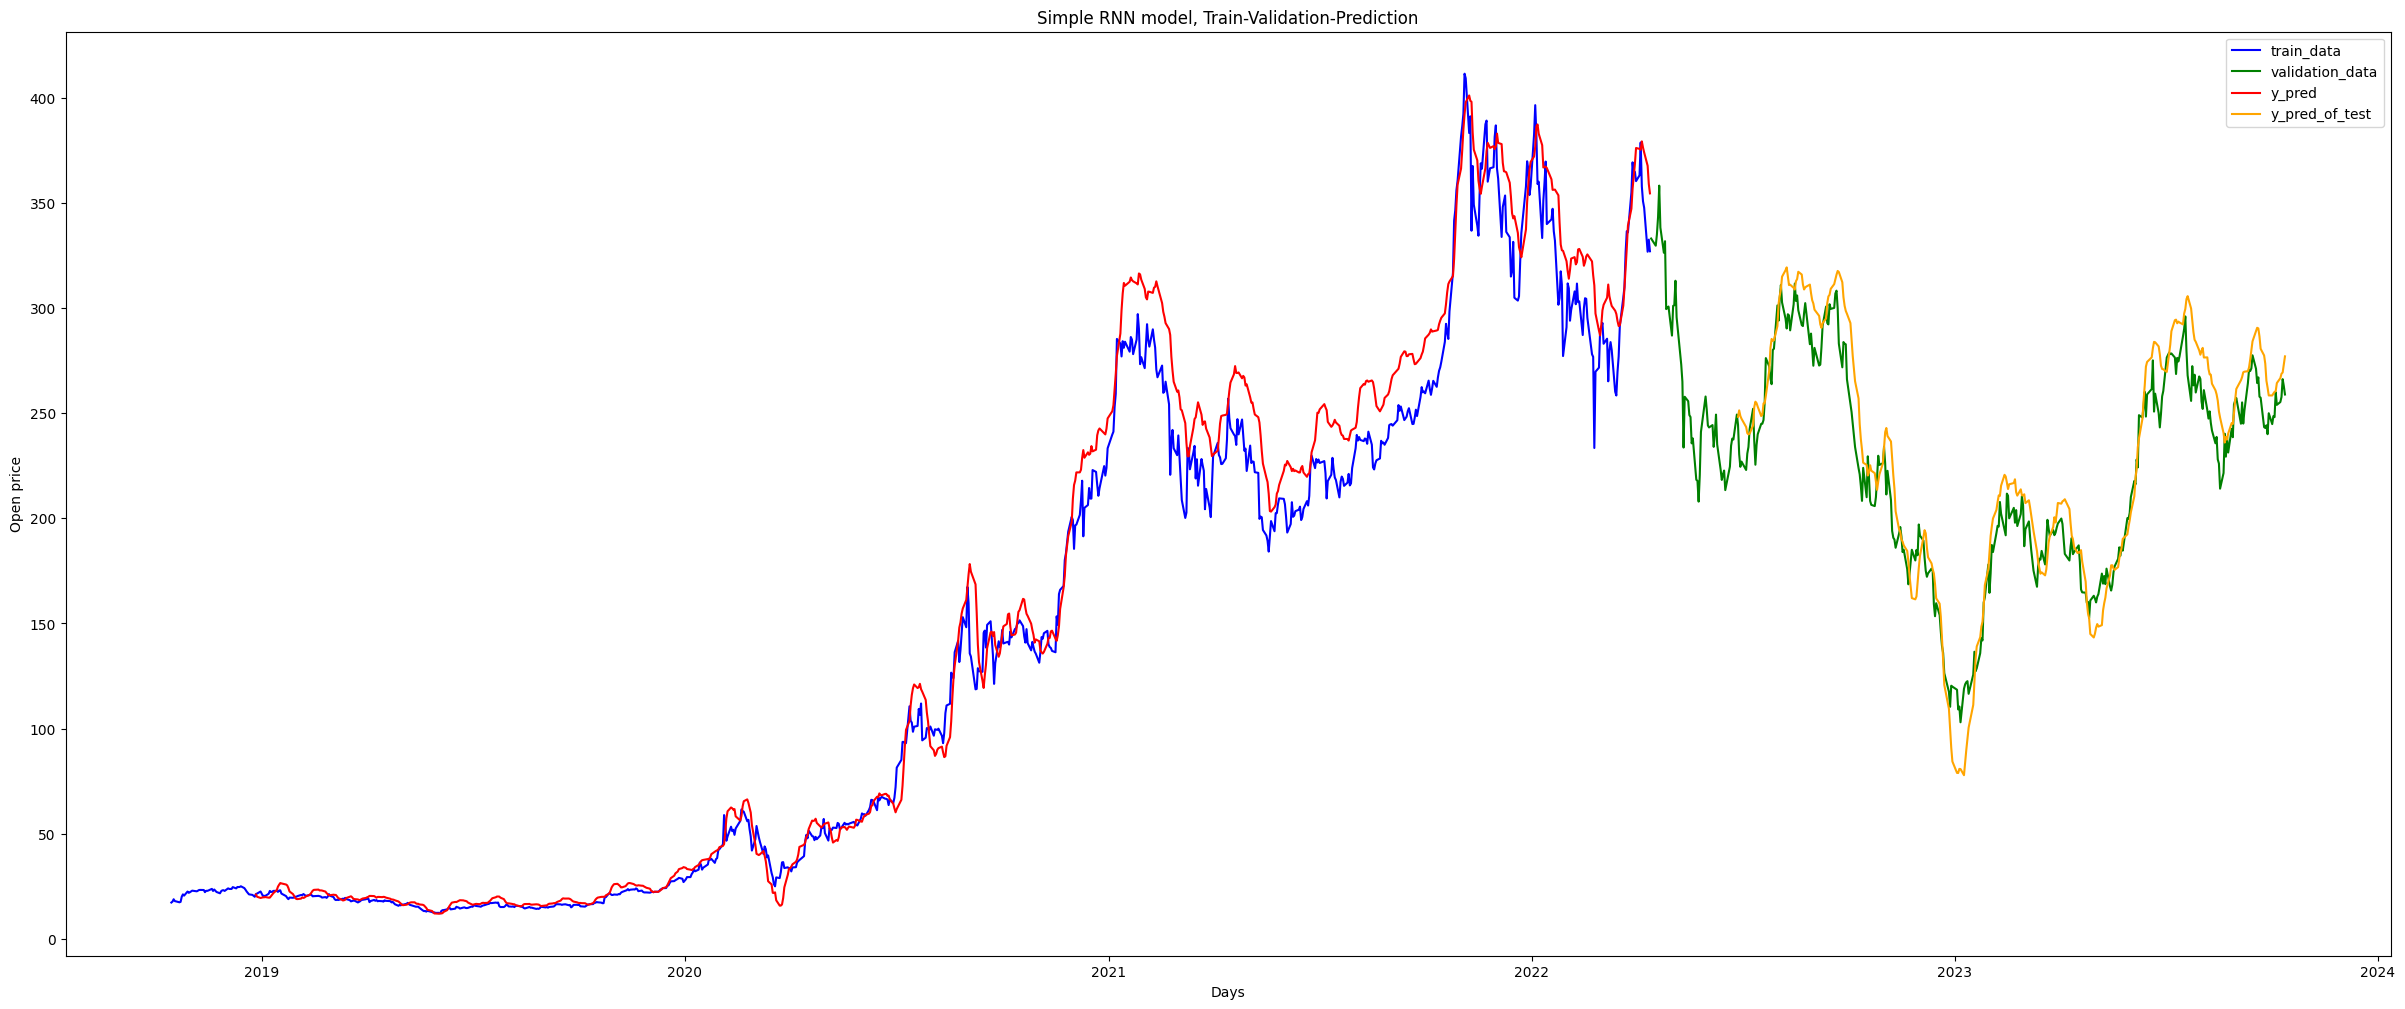

In [ ]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()